In [89]:
import os
from pathlib import Path


import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

HERE = Path(os.getcwd())
HERE

OUT_PATH = HERE / "output"
if not OUT_PATH.exists():
    OUT_PATH.mkdir(exist_ok=True)

In [121]:
with open(HERE / "config" / "config.yaml", 'r') as f:
    config= yaml.safe_load(f)
font_path = HERE / config["font_path"]
assert font_path.exists()
config

{'title': '',
 'effective_date': '',
 'names_path': 'config/names.csv',
 'layout_path': 'config/layout.csv',
 'font_path': 'fonts/IPAexfont00401/ipaexg.ttf',
 'output_path': 'output/seating.png',
 'back_clr': 'white',
 'student_desk': {'padding_x': 10,
  'padding_y': 10,
  'sz_x': 180,
  'student_num': {'box_sz_y': 20,
   'fill_clr': 'white',
   'font_pt': 18,
   'txt_clr': 'black'},
  'kana': {'box_sz_y': 20,
   'fill_clr': 'white',
   'font_pt': 18,
   'txt_clr': 'black'},
  'kanji': {'box_sz_y': 30,
   'fill_clr': 'white',
   'font_pt': 27,
   'txt_clr': 'black'}},
 'teacher_desk': {'sz_x': 50,
  'sz_y': 300,
  'fill_clr': 'white',
  'font_pt': 40,
  'txt_clr': 'black'}}

In [123]:
config["student_desk"]["kana"]["box_sz_y"]

20

In [142]:
names_df = pd.read_csv(
    Path(HERE) / "config" / "names.csv", header=0
)
names_df

,number,name,kana,group
0,1,安藤 光希,あんどう こうき,B
1,2,石田 晴香,いしだ はるか,B
2,3,井上 蓮斗,いのうえ れんと,A
3,4,上原 芽衣,うえはら めい,B
4,5,大久保 悠真,おおくぼ ゆうま,B
5,6,加藤 紗季,かとう さき,B
6,7,川口 翔,かわぐち しょう,B
7,8,北村 莉央,きたむら りお,B
8,9,小林 拓海,こばやし たくみ,B
9,10,斉藤 美月,さいとう みづき,A


In [143]:
layout_df = pd.read_csv(
    Path(HERE) / "config" / "layout.csv", header=0, index_col=0
)
layout_df

,1,2,3,4,5,6,7
0,,,,,,,
1,e,A,A,A,A,A,e
2,B,B,B,B,B,B,B
3,B,B,B,B,B,B,B
4,B,B,B,B,B,B,B
5,B,B,B,B,B,B,B
6,B,B,x,x,x,x,x


In [144]:
groups = names_df["group"].unique()
assert "x" not in groups
assert "e" not in groups
groups

array(['B', 'A'], dtype=object)

In [145]:
np.append(groups, ["e", "x"])

array(['B', 'A', 'e', 'x'], dtype=object)

In [146]:
names_df[names_df["group"]=="A"]

,number,name,kana,group
2,3,井上 蓮斗,いのうえ れんと,A
9,10,斉藤 美月,さいとう みづき,A
10,11,佐々木 陽菜,ささき はるな,A
19,20,西村 杏,にしむら あん,A
30,31,安田 樹,やすだ いつき,A


In [96]:
len(names_df[names_df["group"]=="B"])

30

In [108]:
layout_np = layout_df.to_numpy()
layout_np

array([['e', 'A', 'A', 'A', 'A', 'A', 'e'],
       ['B', 'B', 'B', 'B', 'B', 'B', 'B'],
       ['B', 'B', 'B', 'B', 'B', 'B', 'B'],
       ['B', 'B', 'B', 'B', 'B', 'B', 'B'],
       ['B', 'B', 'B', 'B', 'B', 'B', 'B'],
       ['B', 'B', 'x', 'x', 'x', 'x', 'x']], dtype=object)

In [151]:
layout_np.flatten(order="C")

array(['e', 'A', 'A', 'A', 'A', 'A', 'e', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'x', 'x',
       'x', 'x', 'x'], dtype=object)

In [161]:
np.tile(np.arange(1, layout_np.shape[0]+1), layout_np.shape[1])

array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6])

In [162]:
np.arange(1, layout_np.shape[1] + 1).repeat(layout_np.shape[0])

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7])

In [150]:
layout_np.flatten(order="F")

array(['e', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A',
       'B', 'B', 'B', 'B', 'x', 'A', 'B', 'B', 'B', 'B', 'x', 'A', 'B',
       'B', 'B', 'B', 'x', 'A', 'B', 'B', 'B', 'B', 'x', 'e', 'B', 'B',
       'B', 'B', 'x'], dtype=object)

In [164]:
np.tile(np.arange(1, layout_np.shape[1]+1), layout_np.shape[0])

array([1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1,
       2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7])

In [163]:
np.arange(1, layout_np.shape[0] + 1).repeat(layout_np.shape[1])

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6])

In [109]:
grps, cnt = np.unique(layout_np, return_counts=True)
grps, cnt

(array(['A', 'B', 'e', 'x'], dtype=object), array([ 5, 30,  2,  5]))

In [140]:
hoge = np.arange(1, cnt[1]+1)
np.random.shuffle(hoge)
hoge

array([12,  8, 25, 16, 22,  7, 23, 11,  5, 15, 26, 30, 14, 21, 10, 28, 27,
        1, 13, 20, 17,  4, 24,  3, 18,  2, 29,  6,  9, 19])

In [136]:
np.sort(grps)

array(['A', 'B', 'e', 'x'], dtype=object)

In [118]:
np.sort(np.append(groups, ["e", "x"]))

array(['A', 'B', 'e', 'x'], dtype=object)

In [148]:
for i, row in names_df.iterrows():
    print(i)
    print(row["name"])

0
安藤 光希
1
石田 晴香
2
井上 蓮斗
3
上原 芽衣
4
大久保 悠真
5
加藤 紗季
6
川口 翔
7
北村 莉央
8
小林 拓海
9
斉藤 美月
10
佐々木 陽菜
11
白石 颯太
12
杉山 愛
13
高橋 純
14
竹内 美咲
15
田村 拓真
16
千葉 結衣
17
土屋 遼
18
中島 真央
19
西村 杏
20
野口 海翔
21
萩原 奈々
22
林 駿
23
平田 花音
24
藤本 玲奈
25
本田 光
26
前田 翼
27
松井 彩乃
28
南 結月
29
森 遥
30
安田 樹
31
山口 蒼
32
横山 琴音
33
吉田 奏
34
若松 優


In [110]:
np.array_equal(grps, np.append(groups, ["e", "x"]))

False

In [111]:
grps!='e'

array([ True,  True, False,  True])

In [112]:
layout_np=="x"

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False,  True,  True,  True,  True,  True]])

In [102]:
layout_np=="e"

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False,  True,  True,  True,  True,  True]])

In [103]:
flat_layout = pd.DataFrame(layout_np.flatten())
flat_layout

,0
0,x
1,A
2,A
3,A
4,A
5,A
6,x
7,B
8,B
9,B


In [104]:
flat_layout[flat_layout=='x']

,0
0,x
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,x
7,NaN
8,NaN
9,NaN


In [105]:
layout_df.shape

(6, 7)

In [106]:
img = Image.new("RGB", (
    1024, 768
), color=(255, 255, 255))
draw = ImageDraw.Draw(img)
# plt.imshow(img)

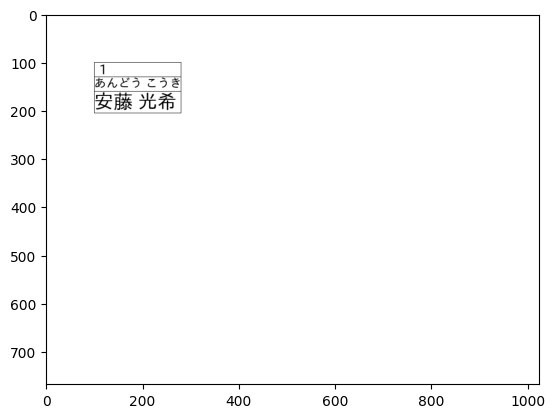

In [29]:
img = Image.new("RGB", (
    1024, 768
), color="white")
draw = ImageDraw.Draw(img)

# student number
draw.rectangle(
    [100, 100, 280, 130],
    fill=(255, 255, 255),
    outline="black"
)
draw.text(
    (110, 100),
    "1",
    fill="black",
    font=ImageFont.truetype(font_path, size=28)
)

# kana
draw.rectangle(
    [100, 130, 280, 160],
    fill=(255,255,255),
    outline="black"
)
draw.text(
    (100, 130),
    str(names_df.iloc[0]["kana"]),
    align="center",
    fill="black",
    font=ImageFont.truetype(font_path, size=25)
)

# kanji
draw.rectangle(
    [100, 160, 280, 205],
    fill=(255, 255, 255),
    outline="black",
)
draw.text(
    (100, 160),
    names_df.iloc[0]["name"],
    align="center",
    fill="black",
    font=ImageFont.truetype(font_path, size = 40),
)

plt.imshow(img)

In [30]:
type(draw)

PIL.ImageDraw.ImageDraw

In [6]:
def draw_name_box(
        number: int, name: str, kana: str, xyxy: list[int], out_color: str | tuple = "black"
):
    draw.rectangle(
        xyxy,
        fill=(255, 255, 255),
        outline=out_color,
    )
    draw.text(
        (xyxy[0] + 10, xyxy[1] + 10),
        f"{number} {name}",
        fill=out_color,
        font=ImageFont.truetype(font_path, size=32),
    )

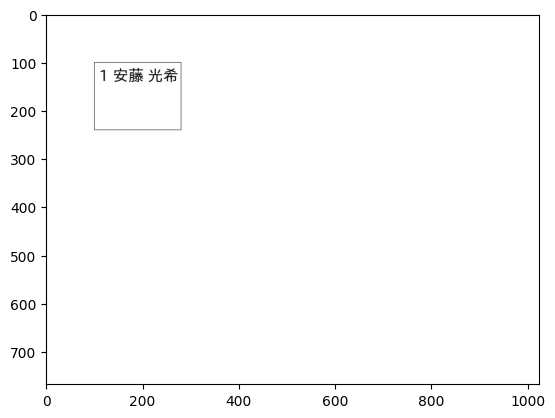

In [9]:
draw_name_box(
    1,
    names_df.iloc[0]["name"],
    names_df.iloc[0]["kana"],
    [100, 100, 280, 240],
    out_color="black"
)
plt.imshow(img)

In [8]:
# save image
img.save(OUT_PATH / "test.png")